## Exploring Race Census Data
by Danielle Parnes

**About this assignment**: I'm going to be looking into the census data on race. Our project is looking is looking at traffic fatalities, and we know from existing literature that people of color are victims of traffic violence at much higher rates than white people. While we usually here about the statistic in terms of the race of the victim, for this excercise I want to look into how this plays out geographically. Are neighborhoods that are majority people of color also experiencing higher than average crashes or fatalities?



## Import the libraries and tools I need

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

## Load the data

In [2]:
gdf = gpd.read_file('data/acs2019_5yr_B03002_14000US06037293306.geojson')

## What does the data look like?

In [9]:
#how many rows and columns
gdf.shape

(1005, 45)

In [10]:
# display all the columns
pd.set_option('display.max_columns', None)

In [12]:
#what does the beginning of the data look like?
gdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3095.0,354.0,2616.0,306.0,19.0,15.0,3.0,6.0,331.0,142.0,3.0,6.0,8.0,13.0,115.0,71.0,0.0,12.0,115.0,71.0,1188.0,414.0,731.0,310.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,383.0,311.0,74.0,52.0,34.0,28.0,40.0,46.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,3258.0,344.0,2882.0,358.0,74.0,102.0,15.0,24.0,220.0,156.0,0.0,12.0,0.0,12.0,67.0,65.0,0.0,12.0,67.0,65.0,147.0,86.0,99.0,66.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,48.0,55.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,3731.0,465.0,2986.0,435.0,198.0,165.0,0.0,17.0,486.0,101.0,0.0,17.0,47.0,75.0,14.0,25.0,0.0,17.0,14.0,25.0,2616.0,576.0,1661.0,572.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,874.0,477.0,81.0,80.0,48.0,62.0,33.0,51.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,2338.0,236.0,1812.0,271.0,87.0,107.0,0.0,12.0,341.0,120.0,0.0,12.0,0.0,12.0,98.0,74.0,0.0,12.0,98.0,74.0,1364.0,223.0,822.0,230.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,497.0,231.0,45.0,42.0,11.0,18.0,34.0,39.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,394.0,3587.0,363.0,3126.0,359.0,205.0,232.0,0.0,12.0,194.0,119.0,0.0,12.0,0.0,12.0,62.0,44.0,0.0,12.0,62.0,44.0,297.0,146.0,224.0,142.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,45.0,38.0,28.0,32.0,28.0,32.0,0.0,12.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [13]:
#what does the end of the data look like?
gdf.tail()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",26.0,18.0,19.0,18.0,7.0,10.0,11.0,11.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,1.0,4.0,0.0,12.0,1.0,4.0,7.0,12.0,3.0,8.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,4.0,8.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",1175.0,178.0,788.0,161.0,393.0,108.0,232.0,97.0,26.0,34.0,36.0,37.0,24.0,31.0,25.0,33.0,52.0,32.0,24.0,32.0,28.0,25.0,387.0,104.0,243.0,86.0,14.0,24.0,11.0,20.0,14.0,24.0,0.0,12.0,73.0,34.0,32.0,34.0,27.0,34.0,5.0,7.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",3966936.0,82.0,2044527.0,6867.0,1129956.0,5063.0,341750.0,4634.0,6374.0,836.0,454688.0,4897.0,5103.0,845.0,14762.0,1287.0,91894.0,3004.0,5197.0,817.0,86697.0,2877.0,1922409.0,6867.0,935216.0,10449.0,12419.0,1288.0,22466.0,1638.0,6254.0,760.0,1314.0,393.0,887733.0,10522.0,57007.0,2772.0,31599.0,1957.0,25408.0,1709.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


**It looks like the summary data row might be the last row rather than the first!**

<AxesSubplot:>

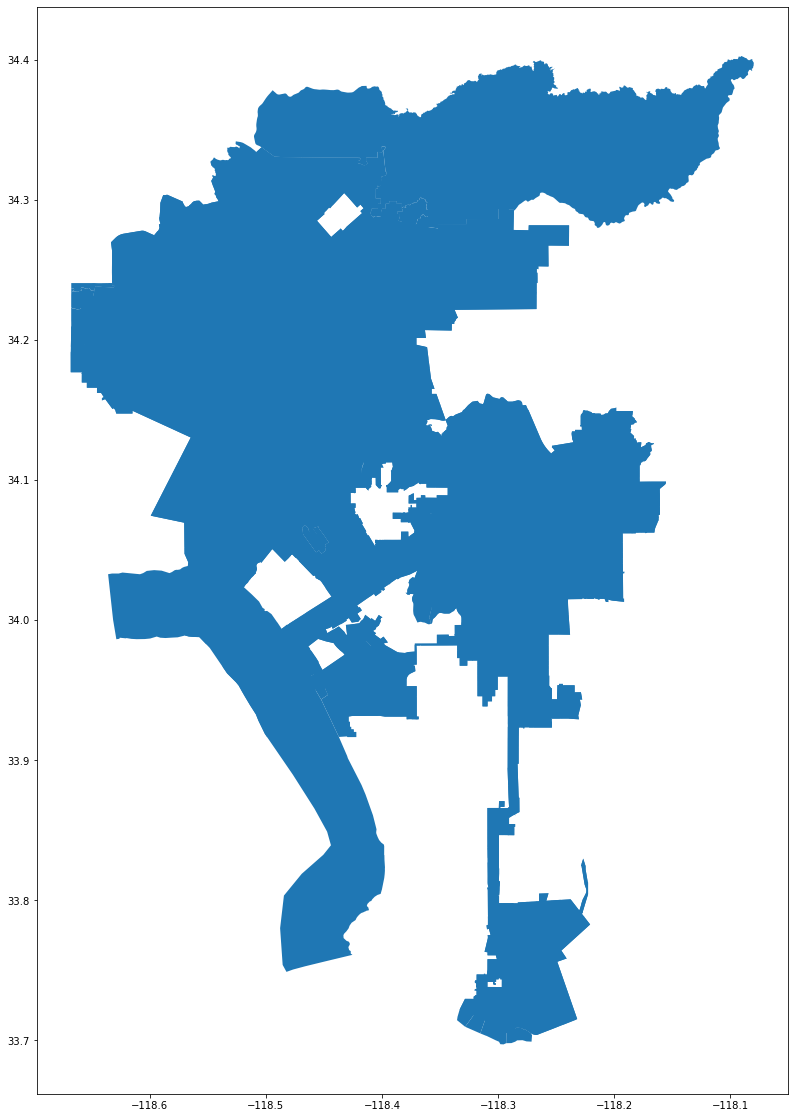

In [14]:
#What does the data looked like geographically?
gdf.plot(figsize=(20,20))

**Hm, there is something weird happening on the left side of the map that does not look like the map of LA city. Let's see if removing the summary data row fixes it, and if not I'll do some more digging.**

## Delete summary row

In [21]:
#Let's look at the summary info 
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1005 non-null   object  
 1   name              1005 non-null   object  
 2   B03002001         1005 non-null   float64 
 3   B03002001, Error  1005 non-null   float64 
 4   B03002002         1005 non-null   float64 
 5   B03002002, Error  1005 non-null   float64 
 6   B03002003         1005 non-null   float64 
 7   B03002003, Error  1005 non-null   float64 
 8   B03002004         1005 non-null   float64 
 9   B03002004, Error  1005 non-null   float64 
 10  B03002005         1005 non-null   float64 
 11  B03002005, Error  1005 non-null   float64 
 12  B03002006         1005 non-null   float64 
 13  B03002006, Error  1005 non-null   float64 
 14  B03002007         1005 non-null   float64 
 15  B03002007, Error  1005 non-null   float64 
 16  B03002008       

In [22]:
#and the beginning of the data
gdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3095.0,354.0,2616.0,306.0,19.0,15.0,3.0,6.0,331.0,142.0,3.0,6.0,8.0,13.0,115.0,71.0,0.0,12.0,115.0,71.0,1188.0,414.0,731.0,310.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,383.0,311.0,74.0,52.0,34.0,28.0,40.0,46.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,3258.0,344.0,2882.0,358.0,74.0,102.0,15.0,24.0,220.0,156.0,0.0,12.0,0.0,12.0,67.0,65.0,0.0,12.0,67.0,65.0,147.0,86.0,99.0,66.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,48.0,55.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,3731.0,465.0,2986.0,435.0,198.0,165.0,0.0,17.0,486.0,101.0,0.0,17.0,47.0,75.0,14.0,25.0,0.0,17.0,14.0,25.0,2616.0,576.0,1661.0,572.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,874.0,477.0,81.0,80.0,48.0,62.0,33.0,51.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,2338.0,236.0,1812.0,271.0,87.0,107.0,0.0,12.0,341.0,120.0,0.0,12.0,0.0,12.0,98.0,74.0,0.0,12.0,98.0,74.0,1364.0,223.0,822.0,230.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,497.0,231.0,45.0,42.0,11.0,18.0,34.0,39.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,394.0,3587.0,363.0,3126.0,359.0,205.0,232.0,0.0,12.0,194.0,119.0,0.0,12.0,0.0,12.0,62.0,44.0,0.0,12.0,62.0,44.0,297.0,146.0,224.0,142.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,45.0,38.0,28.0,32.0,28.0,32.0,0.0,12.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [24]:
#and the end of the data to check that that's what I want to delete and see what rown number it is
gdf.tail()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",26.0,18.0,19.0,18.0,7.0,10.0,11.0,11.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,1.0,4.0,0.0,12.0,1.0,4.0,7.0,12.0,3.0,8.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,4.0,8.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",1175.0,178.0,788.0,161.0,393.0,108.0,232.0,97.0,26.0,34.0,36.0,37.0,24.0,31.0,25.0,33.0,52.0,32.0,24.0,32.0,28.0,25.0,387.0,104.0,243.0,86.0,14.0,24.0,11.0,20.0,14.0,24.0,0.0,12.0,73.0,34.0,32.0,34.0,27.0,34.0,5.0,7.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",3966936.0,82.0,2044527.0,6867.0,1129956.0,5063.0,341750.0,4634.0,6374.0,836.0,454688.0,4897.0,5103.0,845.0,14762.0,1287.0,91894.0,3004.0,5197.0,817.0,86697.0,2877.0,1922409.0,6867.0,935216.0,10449.0,12419.0,1288.0,22466.0,1638.0,6254.0,760.0,1314.0,393.0,887733.0,10522.0,57007.0,2772.0,31599.0,1957.0,25408.0,1709.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [25]:
# drop the row summary last row
gdf = gdf.drop([1004])

In [27]:
# look at the end of the data again to see if it was delted
gdf.tail()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",223.0,75.0,169.0,73.0,136.0,72.0,16.0,17.0,6.0,9.0,11.0,15.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,54.0,40.0,25.0,30.0,15.0,23.0,0.0,12.0,0.0,12.0,0.0,12.0,14.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",26.0,18.0,19.0,18.0,7.0,10.0,11.0,11.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,1.0,4.0,0.0,12.0,1.0,4.0,7.0,12.0,3.0,8.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,4.0,8.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",1175.0,178.0,788.0,161.0,393.0,108.0,232.0,97.0,26.0,34.0,36.0,37.0,24.0,31.0,25.0,33.0,52.0,32.0,24.0,32.0,28.0,25.0,387.0,104.0,243.0,86.0,14.0,24.0,11.0,20.0,14.0,24.0,0.0,12.0,73.0,34.0,32.0,34.0,27.0,34.0,5.0,7.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


## Clean up the columns and label them

In [28]:
#using the meta data, I'm going to remove the columns that are subcategories of Latino to simplify the data
list(gdf)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [30]:
# let's keep these columns, removing the Latino subcategories
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [31]:
#define gdf as this slimmed down list of columsn
gdf = gdf[columns_to_keep]

In [32]:
#look at what the slimmed down data looks like
gdf.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [33]:
## get the list of new columns in order to relabel them
list(gdf)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [35]:
## rename the columns based on the metadata
gdf.columns = ['geoid',
'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic or Latino',
 'geometry']

In [36]:
#check to see if the new labels worked
gdf.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic or Latino,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [37]:
gdf.sample()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic or Latino,geometry
417,14000US06037190401,"Census Tract 1904.01, Los Angeles, CA",2977.0,2179.0,1691.0,22.0,0.0,345.0,0.0,0.0,121.0,798.0,"MULTIPOLYGON (((-118.30503 34.10538, -118.3046..."


## Check the integrity of the data

In [38]:
# look at a random record
random_tract = gdf.sample()
random_tract

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic or Latino,geometry
873,14000US06037269300,"Census Tract 2693, Los Angeles, CA",3840.0,3694.0,2984.0,65.0,0.0,341.0,0.0,0.0,304.0,146.0,"MULTIPOLYGON (((-118.42465 34.04194, -118.4237..."


In [40]:
# check the value in total population, so I can compare it to the sum of the total non-hispanic and total hispanic dadta
print('Total population: ' + str(random_tract.iloc[0]['Total']))

Total population: 3840.0


In [41]:
print('Non Hispanic + Hispanic or Latino: ' + str(random_tract.iloc[0]['Non Hispanic'] + random_tract.iloc[0]['Hispanic or Latino']))

Non Hispanic + Hispanic or Latino: 3840.0


In [44]:
## let's make sure we kept all the subcategories of non-hispanic
print( 
random_tract.iloc[0]['Non Hispanic White'] + 
      random_tract.iloc[0]['Non Hispanic Black'] + 
      random_tract.iloc[0]['Non Hispanic American Indian and Alaska Native'] + 
      random_tract.iloc[0]['Non Hispanic Asian'] + 
      random_tract.iloc[0]['Non Hispanic Native Hawaiian and Other Pacific Islander'] + 
      random_tract.iloc[0]['Non Hispanic Some other race'] + 
      random_tract.iloc[0]['Non Hispanic Two or more races'])

3694.0


In [46]:
print('Total non hispanic population: ' + str(random_tract.iloc[0]['Non Hispanic']))

Total non hispanic population: 3694.0


_Totals check out!_

**Let's replot the the data on the map to see if slimming down the data and removign the summary data fixed the weirdness on the left side of the map**

<AxesSubplot:>

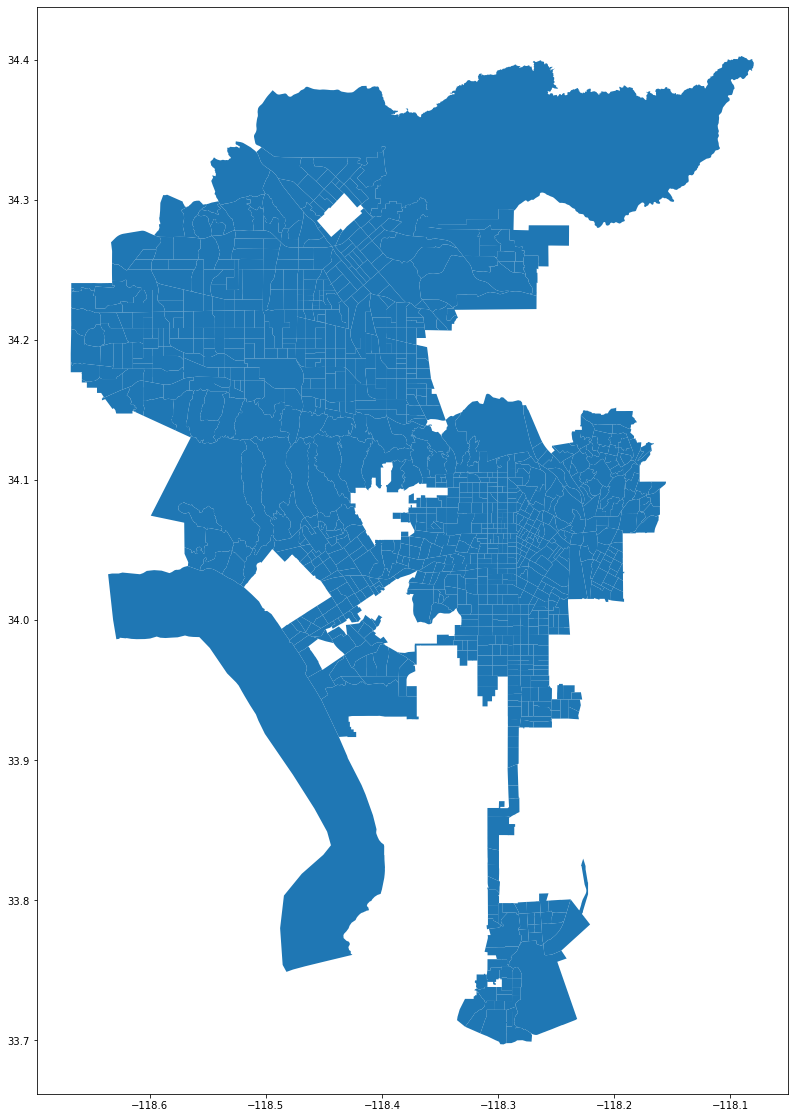

In [47]:
#What does the data looked like geographically?
gdf.plot(figsize=(20,20))

<AxesSubplot:ylabel='Frequency'>

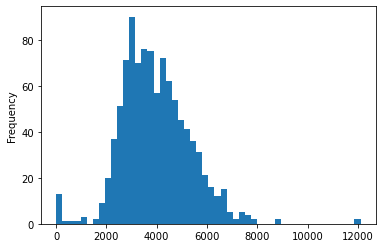

In [48]:
#Still looks off! Let's try creating a bar chart to see if we can find an outlier
# plot it as a historgram with 50 bins
gdf['Total'].plot.hist(bins=50)

In [55]:
# don't see anything super weird above, except potentially there is an outier tract/row that has a total poulation around 12,000.  Let's sort the tracts by population to find out more about that tract.
gdf_sortbypopulation = gdf.sort_values(by='Total',ascending = False)

In [56]:
# let's look at the sorted data to check out the tracts with the highest population
gdf_sortbypopulation.head(10)

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic or Latino,geometry
922,14000US06037275602,"Census Tract 2756.02, Los Angeles, CA",12100.0,10449.0,6371.0,795.0,0.0,2802.0,0.0,0.0,481.0,1651.0,"MULTIPOLYGON (((-118.43226 33.97502, -118.4292..."
847,14000US06037265301,"Census Tract 2653.01, Los Angeles, CA",11977.0,9290.0,3160.0,486.0,17.0,4808.0,19.0,22.0,778.0,2687.0,"MULTIPOLYGON (((-118.45549 34.07585, -118.4546..."
531,14000US06037206020,"Census Tract 2060.20, Los Angeles, CA",8947.0,5083.0,1657.0,2773.0,51.0,328.0,49.0,59.0,166.0,3864.0,"MULTIPOLYGON (((-118.23787 34.05427, -118.2378..."
84,14000US06037111400,"Census Tract 1114, Los Angeles, CA",8735.0,5011.0,3376.0,390.0,0.0,1227.0,0.0,18.0,0.0,3724.0,"MULTIPOLYGON (((-118.50240 34.25117, -118.5023..."
128,14000US06037119002,"Census Tract 1190.02, Los Angeles, CA",7976.0,1332.0,410.0,89.0,0.0,766.0,0.0,9.0,58.0,6644.0,"MULTIPOLYGON (((-118.44012 34.25295, -118.4386..."
263,14000US06037132300,"Census Tract 1323, Los Angeles, CA",7912.0,3016.0,1594.0,57.0,100.0,1211.0,0.0,0.0,54.0,4896.0,"MULTIPOLYGON (((-118.53605 34.20106, -118.5347..."
705,14000US06037226700,"Census Tract 2267, Los Angeles, CA",7661.0,228.0,0.0,210.0,0.0,9.0,0.0,0.0,9.0,7433.0,"MULTIPOLYGON (((-118.26885 34.01806, -118.2685..."
82,14000US06037111301,"Census Tract 1113.01, Los Angeles, CA",7552.0,5312.0,2468.0,443.0,0.0,2089.0,0.0,39.0,273.0,2240.0,"MULTIPOLYGON (((-118.52949 34.25736, -118.5294..."
301,14000US06037135203,"Census Tract 1352.03, Los Angeles, CA",7515.0,6895.0,5302.0,144.0,0.0,1097.0,0.0,0.0,352.0,620.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."
547,14000US06037208000,"Census Tract 2080, Los Angeles, CA",7508.0,2741.0,728.0,764.0,0.0,1053.0,0.0,57.0,139.0,4767.0,"MULTIPOLYGON (((-118.26117 34.05904, -118.2609..."


_Nothing looks weird about the top two outliter tracts_

## Displaying the race data on a map

Now let's start to see what the data looks like on the map. 

In [57]:
# let's get the ilist of columns 
list(gdf)

['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic or Latino',
 'geometry']

In [70]:
# create a new column, and populate it with normalized data to get the percent of total value
gdf['Percent Non Hispanic'] = gdf['Non Hispanic']/gdf['Total']*100
gdf['Percent Non Hispanic White'] = gdf['Non Hispanic White']/gdf['Total']*100
gdf['Percent Non Hispanic Black'] = gdf['Non Hispanic Black']/gdf['Total']*100
gdf['Percent Non Hispanic American Indian and Alaska Native'] = gdf['Non Hispanic American Indian and Alaska Native']/gdf['Total']*100
gdf['Percent Non Hispanic Asian'] = gdf['Non Hispanic Asian']/gdf['Total']*100
gdf['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = gdf['Non Hispanic Native Hawaiian and Other Pacific Islander']/gdf['Total']*100
gdf['Percent Non Hispanic Some other race'] = gdf['Non Hispanic Some other race']/gdf['Total']*100
gdf['Percent Non Hispanic Two or more races'] = gdf['Non Hispanic Two or more races']/gdf['Total']*100
gdf['Percent Hispanic or Latino'] = gdf['Hispanic or Latino']/gdf['Total']*100

In [71]:
gdf.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic or Latino,geometry,Percent Non Hispanic,Percent Non Hispanic Black,Percent Non Hispanic White,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Asian,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races,Percent Hispanic or Latino,Percent Non Hispanic American Indian and Alaska Native
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",72.262433,0.443614,61.078683,0.070044,7.728228,0.186785,2.685034,27.737567,0.070044
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",95.682819,2.173275,84.640235,0.000000,6.461087,0.000000,1.967695,4.317181,0.440529
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",58.783677,3.119584,47.045848,0.000000,7.657161,0.740507,0.220577,41.216323,0.000000
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",63.155051,2.350081,48.946515,0.000000,9.211237,0.000000,2.647218,36.844949,0.000000
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",92.353244,5.278064,80.484037,0.000000,4.994851,0.000000,1.596292,7.646756,0.000000


**Map the percentage black neighborhoods, since we know historically black folks have the highest experience of traffic fatalities**

<AxesSubplot:>

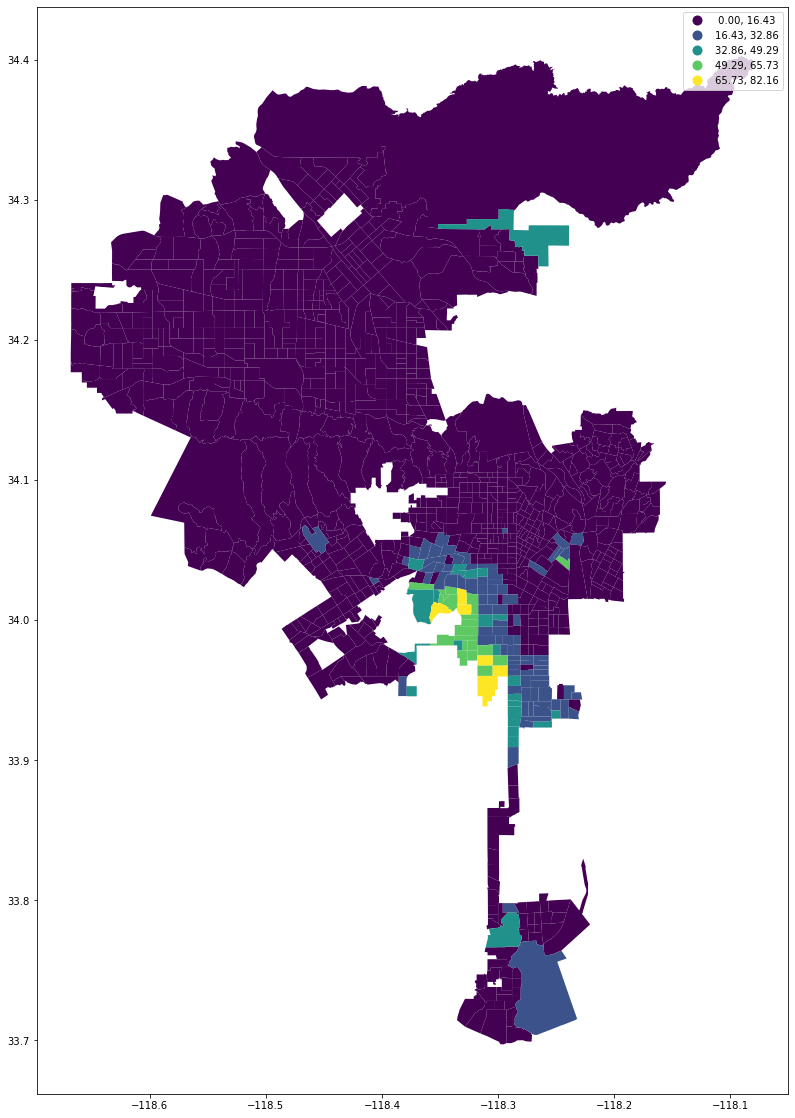

In [72]:
gdf.plot(figsize=(20,20),
         column='Percent Non Hispanic Black',
         legend=True,
         scheme='equal_interval')
         

## Understand where the highest percentage of non-white neighborhoods are

Because I'm interested in seeing if the areas with the most crashes are also the areas with the highest percentage communities of color, I'm going to add a new column that creates the total percentage of non-white population, and then map it

#look at the list of current columns
list(gdf)

In [82]:
# create a new column that shows what percent of the population is non-white by adding up all the non-white columsn
gdf['Percent Non white'] = gdf['Percent Non Hispanic Black'] + gdf['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] + gdf['Percent Non Hispanic Asian'] + gdf['Percent Non Hispanic Some other race'] + gdf['Percent Non Hispanic Two or more races'] + gdf['Percent Hispanic or Latino'] + gdf['Percent Non Hispanic American Indian and Alaska Native']

In [83]:
#let's look to see if this worked correctly 
gdf.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic or Latino,geometry,Percent Non Hispanic,Percent Non Hispanic Black,Percent Non Hispanic White,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Asian,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races,Percent Hispanic or Latino,Percent Non Hispanic American Indian and Alaska Native,Percent Non white
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",72.262433,0.443614,61.078683,0.070044,7.728228,0.186785,2.685034,27.737567,0.070044,38.921317
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",95.682819,2.173275,84.640235,0.000000,6.461087,0.000000,1.967695,4.317181,0.440529,15.359765
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",58.783677,3.119584,47.045848,0.000000,7.657161,0.740507,0.220577,41.216323,0.000000,52.954152
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",63.155051,2.350081,48.946515,0.000000,9.211237,0.000000,2.647218,36.844949,0.000000,51.053485
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",92.353244,5.278064,80.484037,0.000000,4.994851,0.000000,1.596292,7.646756,0.000000,19.515963


In [85]:
# Let's spot check the data integrity 
percent_random_tract = gdf.sample()
percent_random_tract

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic or Latino,geometry,Percent Non Hispanic,Percent Non Hispanic Black,Percent Non Hispanic White,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Asian,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races,Percent Hispanic or Latino,Percent Non Hispanic American Indian and Alaska Native,Percent Non white
896,14000US06037271802,"Census Tract 2718.02, Los Angeles, CA",5644.0,4053.0,2291.0,260.0,0.0,1355.0,0.0,0.0,147.0,1591.0,"MULTIPOLYGON (((-118.41744 34.02161, -118.4165...",71.810773,4.606662,40.591779,0.0,24.007796,0.0,2.604536,28.189227,0.0,59.408221


In [86]:
percent_random_tract.iloc[0]['Percent Non white']

59.408221119773216

In [92]:
# non hispanic plus hispanic should equal to the total
print(percent_random_tract.iloc[0]['Percent Non Hispanic Black'] + 
      percent_random_tract.iloc[0]['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] + 
      percent_random_tract.iloc[0]['Percent Non Hispanic Asian'] + 
      percent_random_tract.iloc[0]['Percent Non Hispanic Some other race'] + 
      percent_random_tract.iloc[0]['Percent Non Hispanic Two or more races'] +
      percent_random_tract.iloc[0]['Percent Hispanic or Latino'] +
      percent_random_tract.iloc[0]['Percent Non Hispanic American Indian and Alaska Native'])

59.408221119773216


_The above two calculations are equal, meaning the added 'Percent non white' column was done correctly!_

**Let's now map to see where areas with high percentage communities of color are using the new column**

<AxesSubplot:>

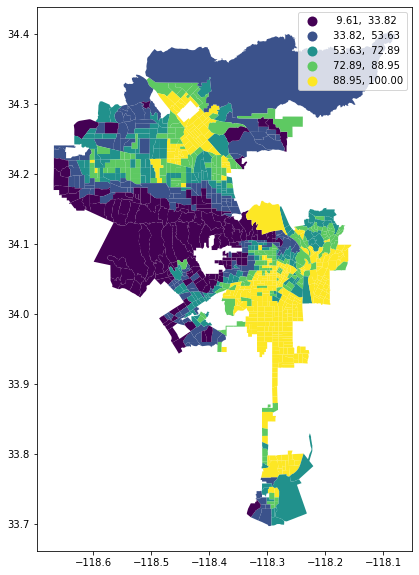

In [94]:
#map the Percent Non white column using Natural Breaks
gdf.plot(figsize=(15,10),
                 column='Percent Non white',
                 legend=True, 
                 scheme='NaturalBreaks')


## Now let's just look at the highest percentage areas on the map of LA so in the future we can compare to the areas with most traffic fatalities

In [95]:
# reproject to Web Mercator
gdf_web_mercator = gdf.to_crs(epsg=3857)

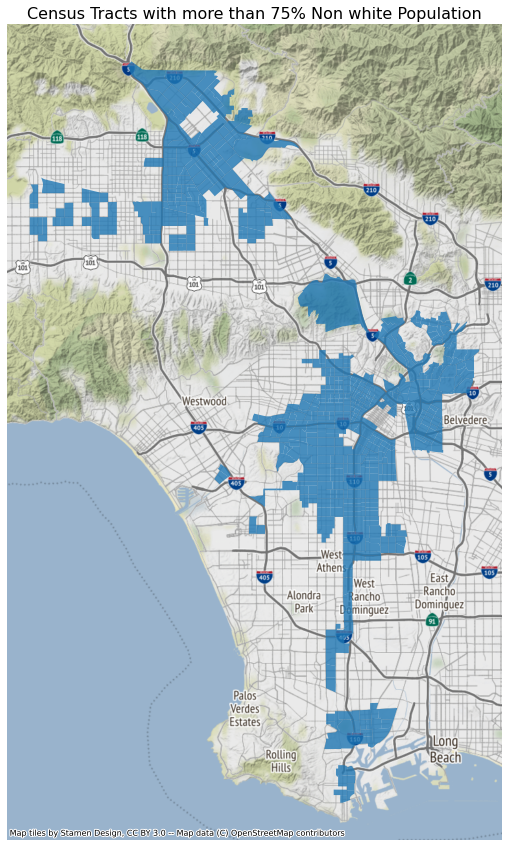

In [96]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Percent Non white'] > 75].plot(dgparnes8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 75% Non white Population',fontsize=16)

# add a basemap
ctx.add_basemap(ax)